# Car Price Prediction Project

With the covid 19 impact in the market, we have seen lot of changes in the car market. Now some cars are in demand hence making them costly and some are not in demand hence cheaper. One of our clients works with small traders, who sell used cars. With the change in market due to covid 19 impact, our client is facing problems with their previous car price valuation machine learning models. So, they are looking for new machine learning models from new data. We have to make car price valuation model.

Problem Statement:

We have to make a model to predict the selling price of used cars.

In [1]:
# Importing the dataset:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [8]:

df=pd.read_csv("car data.csv")
df

,Unnamed: 0,Brand,Model,Year,Variant,Location,version,Number of Owners,KmDriven,Price
0,0,Hyundai,i10,2009,ERA 1.1 IRDE Manual,Noida,Petrol,1st Owner,44315,207699
1,1,Hyundai,i20,2013,ERA 1.4 CRDI Manual,Noida,Diesel,1st Owner,32804,351699
2,2,Hyundai,Verna,2014,FLUIDIC 1.6 SX CRDI Manual,Noida,Diesel,1st Owner,56443,520999
3,3,Hyundai,i20,2013,SPORTZ 1.4 CRDI Manual,Noida,Diesel,1st Owner,64543,364899
4,4,Hyundai,i20,2010,MAGNA O 1.2 Manual,Noida,Petrol,1st Owner,60405,298999
...,...,...,...,...,...,...,...,...,...,...
322,322,Honda,WR-V,2017,1.2 i-VTEC VX MT Manual,Pune,Petrol,1st Owner,69727,649499
323,323,Landrover,Freelander 2,2014,TD4 SE Automatic,Pune,Diesel,2nd Owner,118234,1477799
324,324,Hyundai,Creta,2015,1.6 SX PLUS PETROL Manual,Pune,Petrol,1st Owner,59323,850999
325,325,Jeep,Compass,2017,LIMITED (O) 2.0 Manual,Pune,Diesel,2nd Owner,65729,1381399


In [9]:

df.head()

,Unnamed: 0,Brand,Model,Year,Variant,Location,version,Number of Owners,KmDriven,Price
0,0,Hyundai,i10,2009,ERA 1.1 IRDE Manual,Noida,Petrol,1st Owner,44315,207699
1,1,Hyundai,i20,2013,ERA 1.4 CRDI Manual,Noida,Diesel,1st Owner,32804,351699
2,2,Hyundai,Verna,2014,FLUIDIC 1.6 SX CRDI Manual,Noida,Diesel,1st Owner,56443,520999
3,3,Hyundai,i20,2013,SPORTZ 1.4 CRDI Manual,Noida,Diesel,1st Owner,64543,364899
4,4,Hyundai,i20,2010,MAGNA O 1.2 Manual,Noida,Petrol,1st Owner,60405,298999


In [10]:

df.drop(df.columns[[0]], axis = 1, inplace = True)

In [11]:

df.head()

,Brand,Model,Year,Variant,Location,version,Number of Owners,KmDriven,Price
0,Hyundai,i10,2009,ERA 1.1 IRDE Manual,Noida,Petrol,1st Owner,44315,207699
1,Hyundai,i20,2013,ERA 1.4 CRDI Manual,Noida,Diesel,1st Owner,32804,351699
2,Hyundai,Verna,2014,FLUIDIC 1.6 SX CRDI Manual,Noida,Diesel,1st Owner,56443,520999
3,Hyundai,i20,2013,SPORTZ 1.4 CRDI Manual,Noida,Diesel,1st Owner,64543,364899
4,Hyundai,i20,2010,MAGNA O 1.2 Manual,Noida,Petrol,1st Owner,60405,298999


In [12]:
df.shape

(327, 9)

In [13]:
df.isnull().sum()

Brand               0
Model               0
Year                0
Variant             0
Location            0
version             0
Number of Owners    0
KmDriven            0
Price               0
dtype: int64

In [14]:

df.dtypes

Brand               object
Model               object
Year                 int64
Variant             object
Location            object
version             object
Number of Owners    object
KmDriven             int64
Price                int64
dtype: object

In [15]:

df["Price"] = df["Price"].astype(int)

In [16]:

df.dtypes

Brand               object
Model               object
Year                 int64
Variant             object
Location            object
version             object
Number of Owners    object
KmDriven             int64
Price                int32
dtype: object

In [17]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Brand']=le.fit_transform(df['Brand'])
df['Model']=le.fit_transform(df['Model'])
df['Year']=le.fit_transform(df['Year'])

df['Variant']=le.fit_transform(df['Variant'])
df['Location']=le.fit_transform(df['Location'])
df['version']=le.fit_transform(df['version'])

df['Number of Owners']=le.fit_transform(df['Number of Owners'])

In [18]:
df

,Brand,Model,Year,Variant,Location,version,Number of Owners,KmDriven,Price
0,3,65,0,59,6,1,0,44315,207699
1,3,66,4,60,6,0,0,32804,351699
2,3,57,5,64,6,0,0,56443,520999
3,3,66,4,115,6,0,0,64543,364899
4,3,66,1,84,6,1,0,60405,298999
...,...,...,...,...,...,...,...,...,...
322,2,59,8,19,7,1,0,69727,649499
323,5,26,5,121,7,0,1,118234,1477799
324,3,13,6,35,7,1,0,59323,850999
325,4,11,8,79,7,0,1,65729,1381399


In [19]:
df_cor=df.corr()

In [20]:
df_cor

,Brand,Model,Year,Variant,Location,version,Number of Owners,KmDriven,Price
Brand,1.000000,0.037134,0.117898,0.407273,0.046004,-0.085852,-0.053884,0.102429,0.107722
Model,0.037134,1.000000,-0.140624,0.161088,0.108384,-0.261634,0.016113,0.032311,-0.004275
Year,0.117898,-0.140624,1.000000,0.087569,-0.280752,0.086700,-0.188967,-0.423238,0.508179
Variant,0.407273,0.161088,0.087569,1.000000,-0.039574,-0.054824,-0.048840,-0.028478,0.023190
Location,0.046004,0.108384,-0.280752,-0.039574,1.000000,-0.343323,-0.024765,0.196358,-0.026873
version,-0.085852,-0.261634,0.086700,-0.054824,-0.343323,1.000000,0.032388,-0.380368,-0.406499
Number of Owners,-0.053884,0.016113,-0.188967,-0.048840,-0.024765,0.032388,1.000000,0.065148,-0.131507
KmDriven,0.102429,0.032311,-0.423238,-0.028478,0.196358,-0.380368,0.065148,1.000000,-0.070957
Price,0.107722,-0.004275,0.508179,0.023190,-0.026873,-0.406499,-0.131507,-0.070957,1.000000


Price is highly correlate with Year and least correlate with Brand.

# Data Visualizations

<AxesSubplot:>

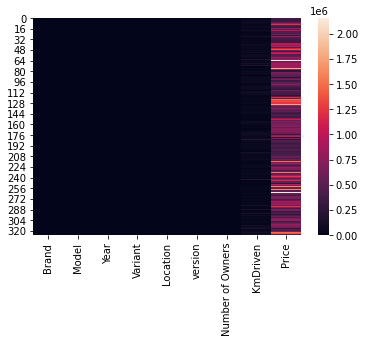

In [21]:
sns.heatmap(df)

No Null Values

<AxesSubplot:>

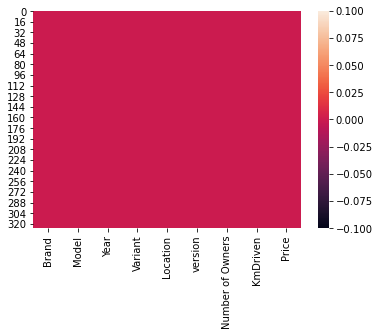

In [23]:
sns.heatmap(df.isnull())

<AxesSubplot:>

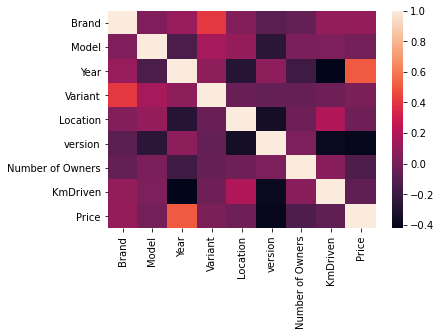

In [24]:
sns.heatmap(df_cor)

Price is highly correlate with Year and least correlate with version

<AxesSubplot:>

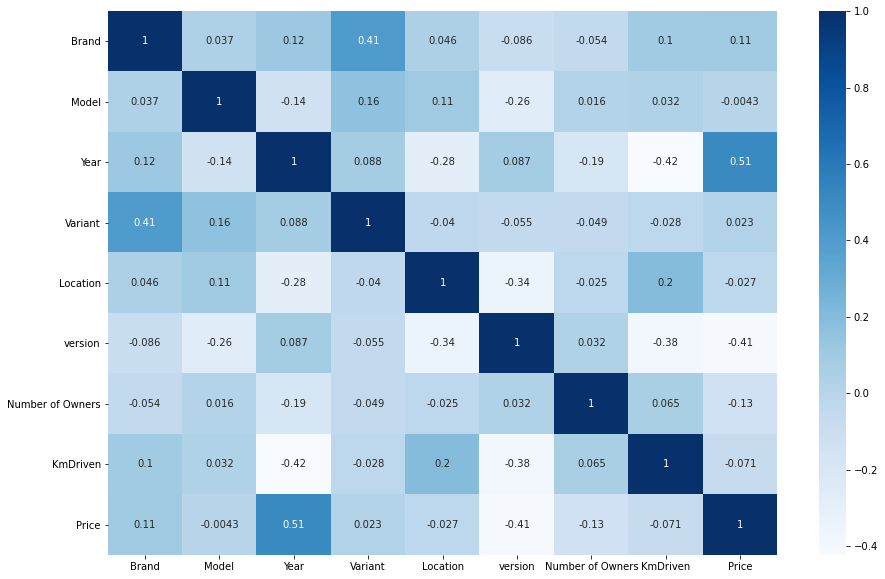

In [25]:
plt.figure(figsize=(15,10))
sns.heatmap(df_cor,cmap='Blues',annot=True)

<AxesSubplot:>

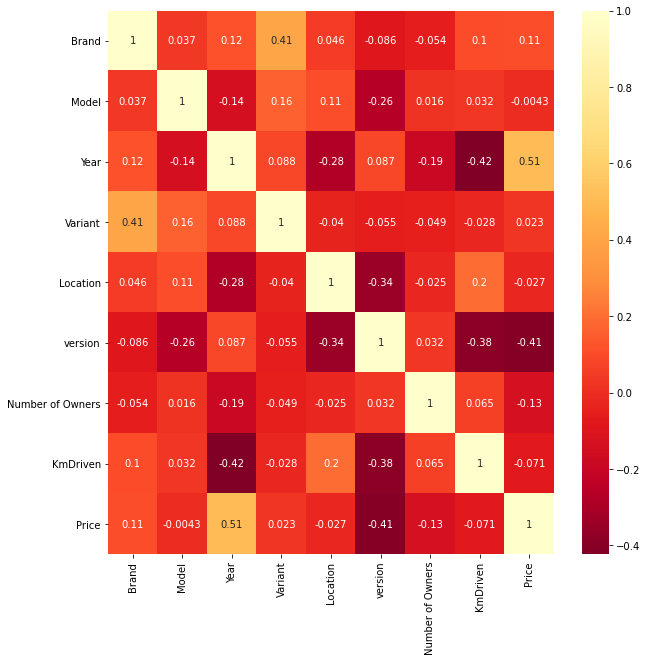

In [27]:
plt.figure(figsize=(10,10))
sns.heatmap(df_cor,cmap='YlOrRd_r',annot=True)

In [28]:
df.columns

Index(['Brand', 'Model', 'Year', 'Variant', 'Location', 'version',
       'Number of Owners', 'KmDriven', 'Price'],
      dtype='object')

<AxesSubplot:xlabel='Brand', ylabel='Density'>

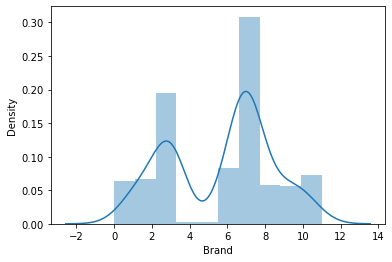

In [29]:
sns.distplot(df['Brand'])

<AxesSubplot:xlabel='Model', ylabel='Density'>

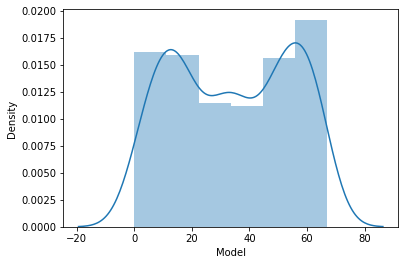

In [30]:
sns.distplot(df['Model'])

<AxesSubplot:xlabel='Year', ylabel='Density'>

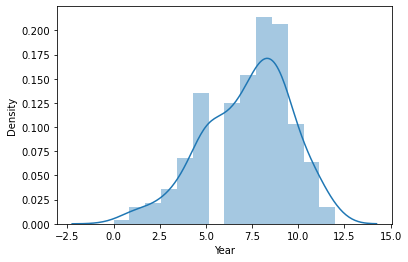

In [31]:
sns.distplot(df['Year'])

<AxesSubplot:xlabel='Variant', ylabel='Density'>

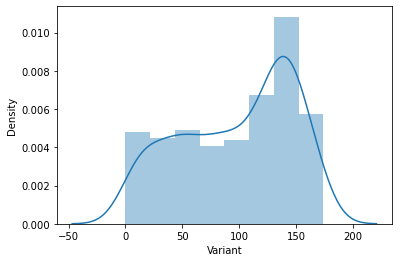

In [32]:
sns.distplot(df['Variant'])

<AxesSubplot:xlabel='Location', ylabel='Density'>

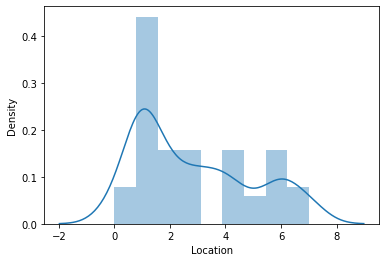

In [33]:
sns.distplot(df['Location'])

<AxesSubplot:xlabel='version', ylabel='Density'>

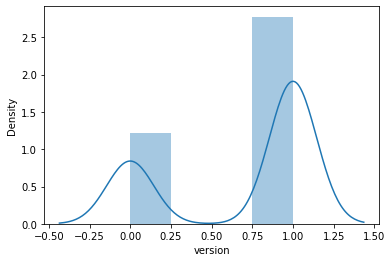

In [34]:
sns.distplot(df['version'])

<AxesSubplot:xlabel='Number of Owners', ylabel='Density'>

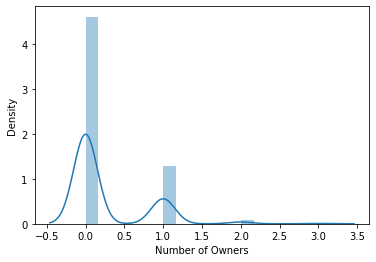

In [35]:

sns.distplot(df['Number of Owners'])

<AxesSubplot:xlabel='KmDriven', ylabel='Density'>

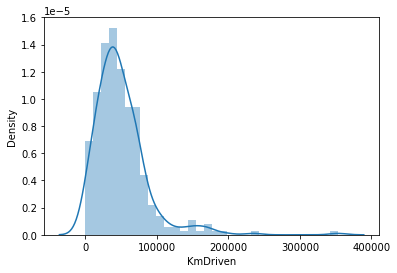

In [36]:

sns.distplot(df['KmDriven'])

data is skewed.

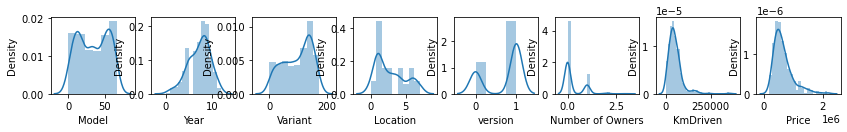

In [37]:
collist=df.columns.values
ncol=14
nrows=15
plt.figure(figsize=(25,25))
for i in range(1,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(df[collist[i]])

<AxesSubplot:xlabel='Price', ylabel='Model'>

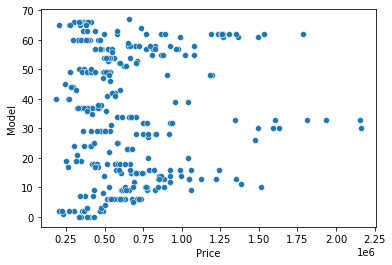

In [38]:
sns.scatterplot(x='Price',y='Model',data=df)

Model range is 0 to 70

<AxesSubplot:xlabel='Price', ylabel='Year'>

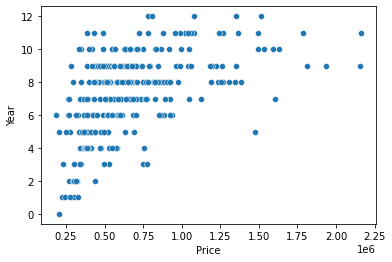

In [39]:
sns.scatterplot(x='Price',y='Year',data=df)

year range is from 0 to 12

<AxesSubplot:xlabel='Price', ylabel='Variant'>

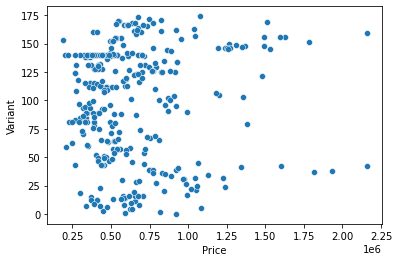

In [40]:
sns.scatterplot(x='Price',y='Variant',data=df)

Variant is scattered between 0 to 175.

<AxesSubplot:xlabel='Price', ylabel='Location'>

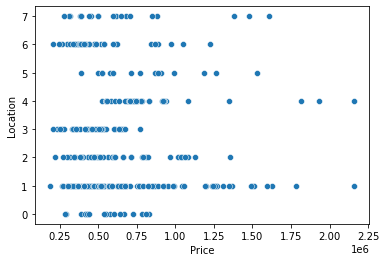

In [42]:
sns.scatterplot(x='Price',y='Location',data=df)

Location is scattered between 0 to 7 range.

<AxesSubplot:xlabel='Price', ylabel='version'>

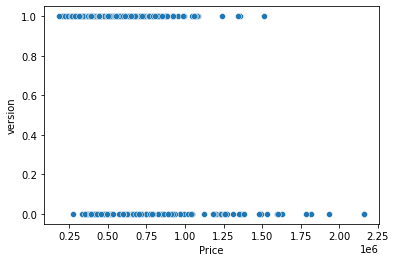

In [43]:
sns.scatterplot(x='Price',y='version',data=df)

version is scattered mainly between 0 to 1.

<AxesSubplot:xlabel='Price', ylabel='Number of Owners'>

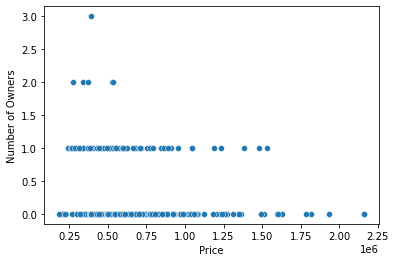

In [45]:
sns.scatterplot(x='Price',y='Number of Owners',data=df)

Number of Owners is scattered in between 0 to 3.

<AxesSubplot:xlabel='Price', ylabel='KmDriven'>

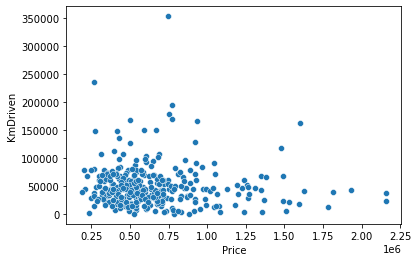

In [46]:

sns.scatterplot(x='Price',y='KmDriven',data=df)

Km driven is mainly scattered between 0 to 20,000.

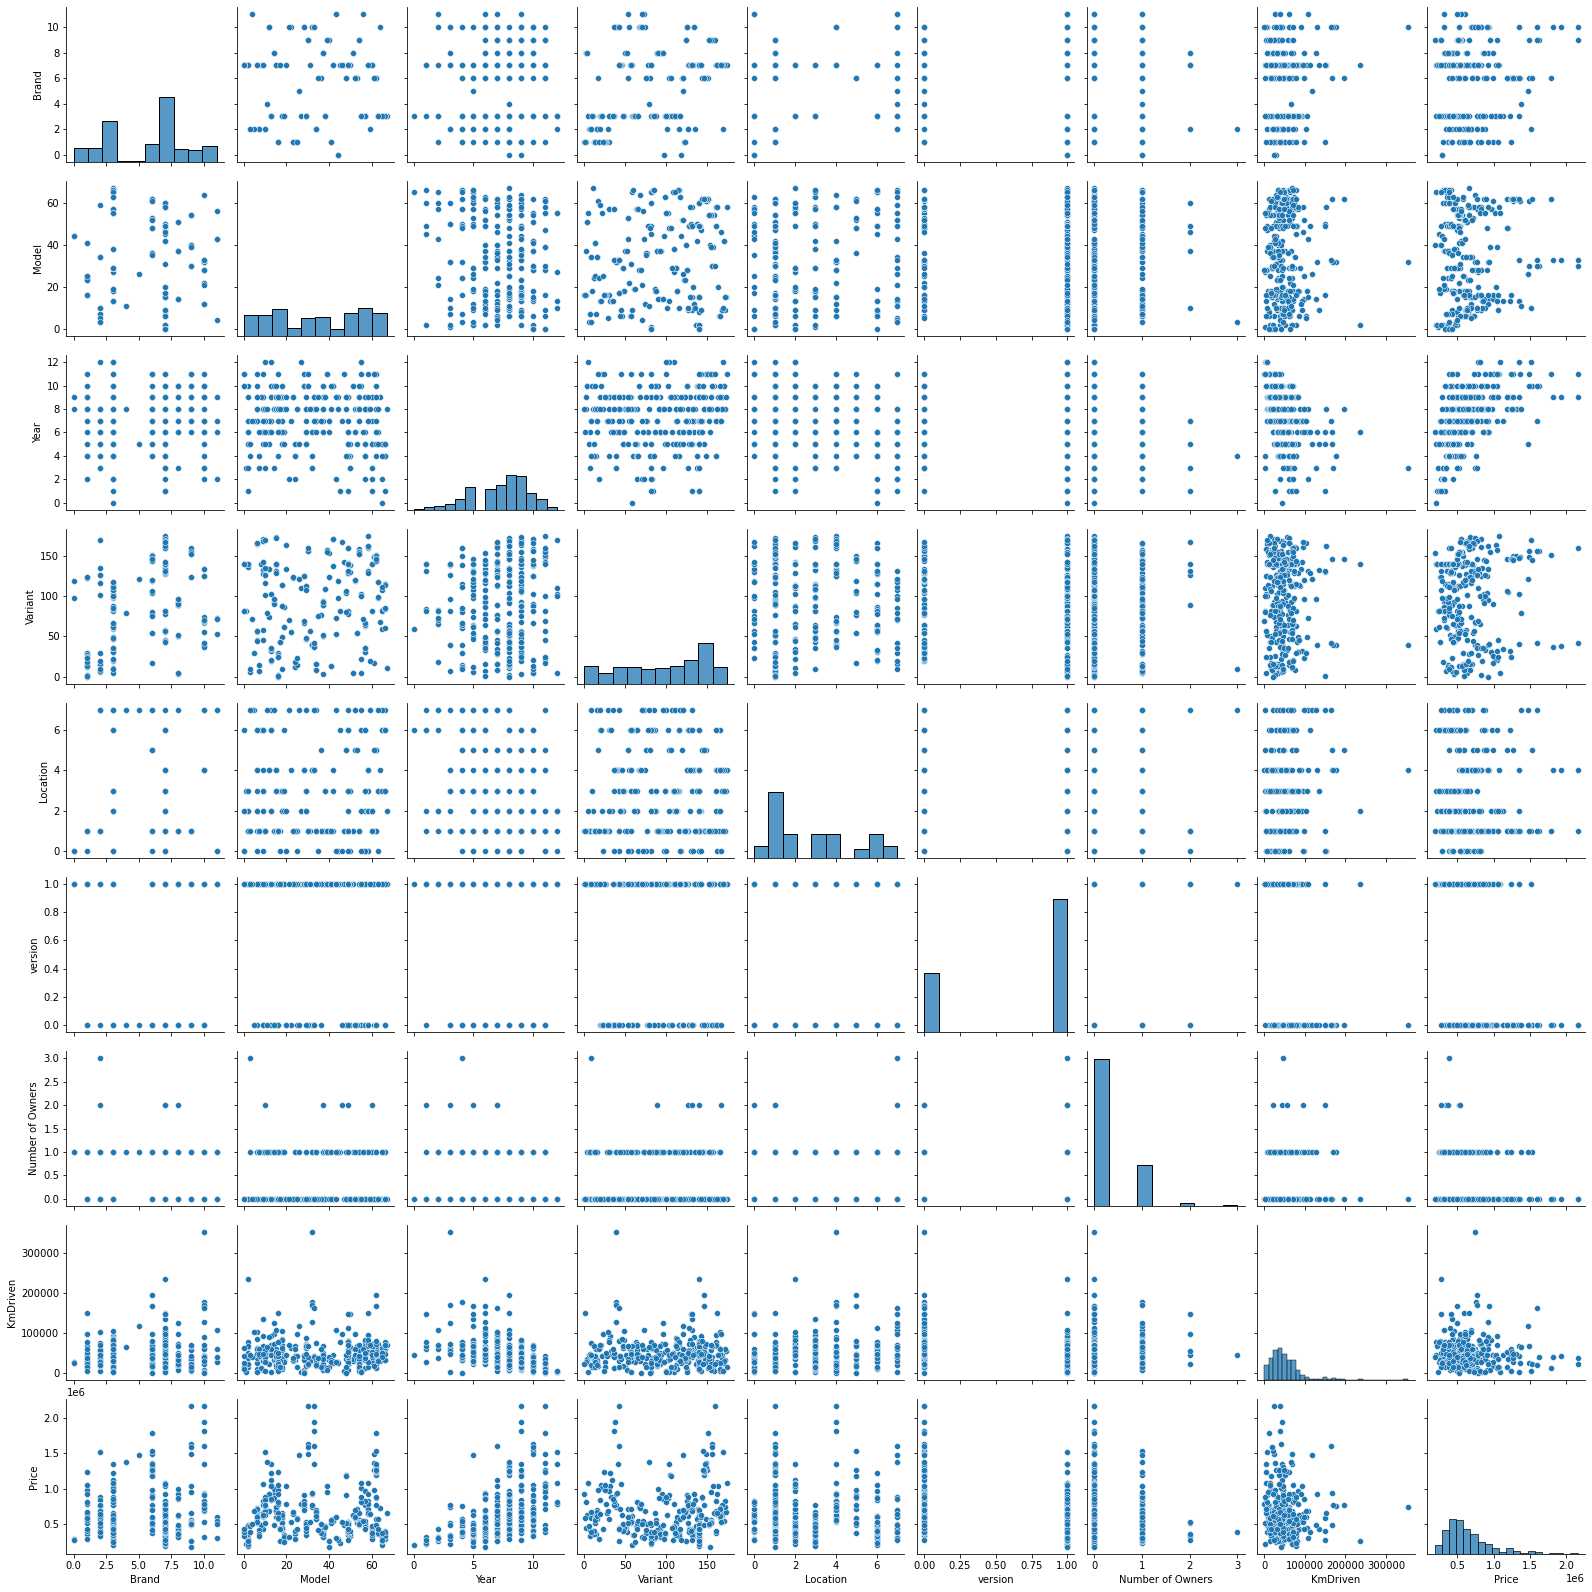

In [48]:
sns.pairplot(df)

In [49]:
df.columns

Index(['Brand', 'Model', 'Year', 'Variant', 'Location', 'version',
       'Number of Owners', 'KmDriven', 'Price'],
      dtype='object')

<AxesSubplot:>

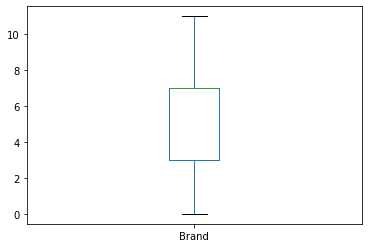

In [50]:
df['Brand'].plot.box()

<AxesSubplot:>

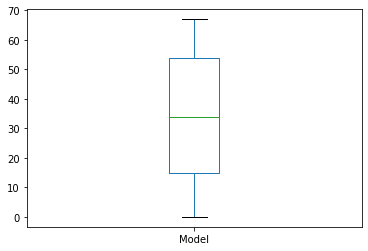

In [51]:
df['Model'].plot.box()

<AxesSubplot:>

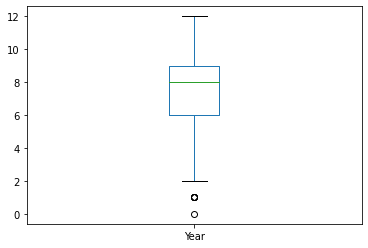

In [52]:
df['Year'].plot.box()

<AxesSubplot:>

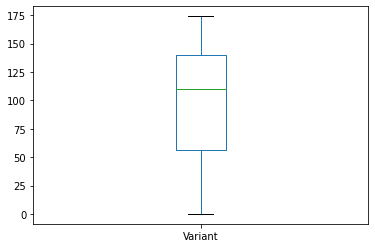

In [53]:
df['Variant'].plot.box()

<AxesSubplot:>

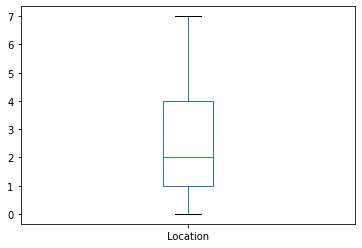

In [54]:

df['Location'].plot.box()

<AxesSubplot:>

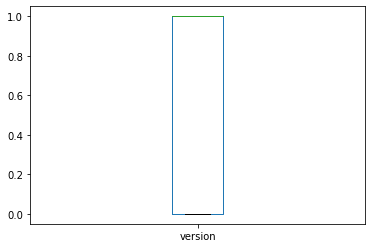

In [55]:

df['version'].plot.box()

<AxesSubplot:>

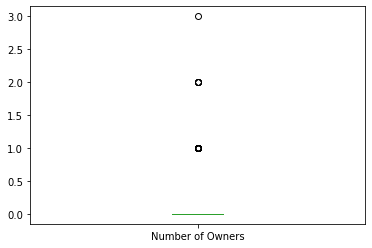

In [56]:
df['Number of Owners'].plot.box()

outliers are present

<AxesSubplot:>

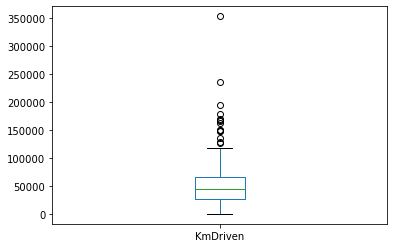

In [57]:
df['KmDriven'].plot.box()

Can Observe outliers

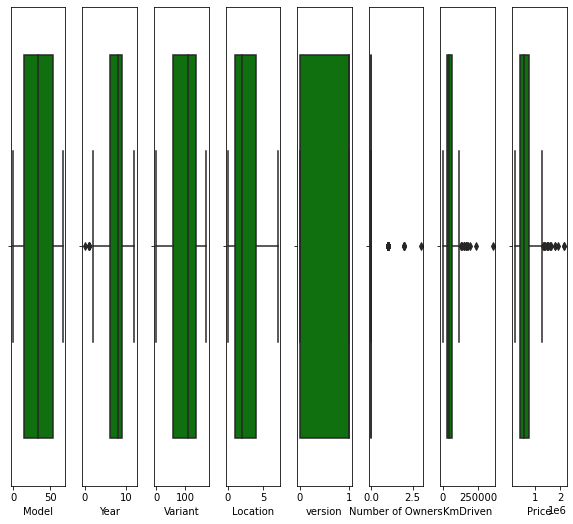

In [58]:
collist=df.columns.values
ncol=12
nrows=10
plt.figure(figsize=(ncol,6*ncol))
for i in range(1,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='v')
    plt.tight_layout()

Removing Outliers

In [59]:
def outlier_IQR(df,feature_name):
    IQR=df[feature_name].quantile(0.75)-df[feature_name].quantile(0.25)
    lower=df[feature_name].quantile(0.25)-(IQR*1.5)
    upper=df[feature_name].quantile(0.25)+(IQR*1.5)
    return (lower,upper)

In [60]:
df.columns

Index(['Brand', 'Model', 'Year', 'Variant', 'Location', 'version',
       'Number of Owners', 'KmDriven', 'Price'],
      dtype='object')

In [65]:
outlier_IQR(df,'KmDriven')

(-29534.0, 84709.0)

In [66]:
df['KmDriven'].describe()

count       327.000000
mean      50235.143731
std       38133.610986
min          89.000000
25%       27587.500000
50%       43983.000000
75%       65668.500000
max      353288.000000
Name: KmDriven, dtype: float64

In [67]:
df.loc[df['KmDriven']>=84709.0,'KmDriven']=84709.0

In [68]:
df['KmDriven'].describe()

count      327.000000
mean     45365.366972
std      23888.649669
min         89.000000
25%      27587.500000
50%      43983.000000
75%      65668.500000
max      84709.000000
Name: KmDriven, dtype: float64

Removing skewness

In [69]:
df.skew()

Brand              -0.220181
Model              -0.030104
Year               -0.465130
Variant            -0.375736
Location            0.585148
version            -0.846818
Number of Owners    1.909361
KmDriven            0.090472
Price               1.707350
dtype: float64

In [70]:
x=df.iloc[:,0:8]

In [71]:
from sklearn.preprocessing import PowerTransformer
power=PowerTransformer(method='yeo-johnson',standardize=True)
df_new=power.fit_transform(x)
df1=pd.DataFrame(df_new,columns=x.columns)

In [72]:
df1.head()

,Brand,Model,Year,Variant,Location,version,Number of Owners,KmDriven
0,-0.98792,1.371487,-2.461751,-0.764495,1.347278,0.663723,-0.55025,0.036668
1,-0.98792,1.408936,-1.361390,-0.744128,1.347278,-1.506652,-0.55025,-0.446331
2,-0.98792,1.065102,-0.995242,-0.662789,1.347278,-1.506652,-0.55025,0.510992
3,-0.98792,1.408936,-1.361390,0.360250,1.347278,-1.506652,-0.55025,0.812818
4,-0.98792,1.408936,-2.255551,-0.258811,1.347278,0.663723,-0.55025,0.659948


In [73]:
df1.skew()

Brand              -0.214299
Model              -0.273881
Year               -0.119656
Variant            -0.405272
Location           -0.023268
version            -0.846818
Number of Owners    1.273061
KmDriven           -0.209046
dtype: float64

In [74]:
y=df.iloc[:,-1]

In [75]:
y

0       207699
1       351699
2       520999
3       364899
4       298999
        ...   
322     649499
323    1477799
324     850999
325    1381399
326     496799
Name: Price, Length: 327, dtype: int32

In [76]:
x.shape

(327, 8)

In [77]:
y.shape

(327,)

Scaling

In [78]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
df_=mms.fit_transform(df1)
df_x=pd.DataFrame(df_)

In [80]:
x=df_x
x

,0,1,2,3,4,5,6,7
0,0.270412,0.978587,0.000000,0.352998,0.928017,1.0,0.000000,0.617280
1,0.270412,0.989319,0.233809,0.358762,0.928017,0.0,0.000000,0.493050
2,0.270412,0.890785,0.311609,0.381781,0.928017,0.0,0.000000,0.739279
3,0.270412,0.989319,0.233809,0.671310,0.928017,0.0,0.000000,0.816911
4,0.270412,0.989319,0.043814,0.496110,0.928017,1.0,0.000000,0.777591
...,...,...,...,...,...,...,...,...
322,0.179918,0.913076,0.578668,0.118242,1.000000,1.0,0.000000,0.865252
323,0.452033,0.503860,0.311609,0.704990,1.000000,0.0,0.976953,1.000000
324,0.270412,0.300100,0.395332,0.213343,1.000000,1.0,0.000000,0.767196
325,0.361132,0.264150,0.578668,0.467638,1.000000,0.0,0.976953,0.828057


In [81]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)

In [82]:
x_train.shape

(219, 8)

In [83]:
x_test.shape

(108, 8)

In [84]:
y_train.shape

(219,)

In [85]:
y_test.shape

(108,)

In [86]:
lr=LinearRegression()

In [87]:

lr.fit(x_train,y_train)

LinearRegression()

In [88]:
lr.coef_

array([  61470.12676498,  -53873.20039293,  846563.33605726,
        -51865.13781563,  -42006.07724006, -392310.41778429,
         11058.82938576,  -95014.04647734])

In [89]:

lr.intercept_

585736.8139962985

In [90]:
lr.score(x_train,y_train)

0.5034031101356375

In [91]:
#predict the values
pred=lr.predict(x_test)
print("predicted result price:",pred)
print("actual price:",y_test)

predicted result price: [ 339799.72242175  793434.09765265  553055.23108878 1035797.76303697
  639983.34826543  431227.21340873  586626.9128079   825772.24797438
  603833.90448861  593410.75263227  631883.47409634  840600.69339523
  540899.57320888  875663.22933686  613990.10496972  827485.27818693
  717135.5867746   247516.5736219   808625.72775775  135283.95200562
  658538.43668494  887936.5989097   124255.75034126  652946.19850851
  179675.02833328  514825.36301202  304200.70663362  693950.56992621
  679836.69635127  236528.370481    883657.40422749  688096.9160141
 1152384.53716473  830694.03328086  457372.73144798 1046115.93350575
  422662.93416937  535698.92487083  885018.3926547   541002.33279568
  645688.48264584  527330.96747351  674004.85205883  407151.11090126
  405168.49082173  859904.48549835  816308.99816588  710650.5593827
  465041.00797297  708943.56679502 1086764.50596828  334319.87622359
  669957.37268559 1082751.01508509  675092.06072719  288728.38469331
  921520.624

In [92]:
print("error :")
print('Mean absolute error :',mean_absolute_error(y_test,pred))
print('Mean squared error :',mean_squared_error(y_test,pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred)))

error :
Mean absolute error : 183083.82174599616
Mean squared error : 53056573244.99547
Root Mean Squared Error: 230340.12513019843


In [93]:
from sklearn.metrics import r2_score
print(r2_score(y_test,pred))

0.38787161286364147



Ensemble Techniques

In [94]:
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor(n_estimators=100,random_state=42)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(r2_score(y_test,predrf))
print(mean_squared_error(y_test,predrf))

0.8295309019360027
14775505233.064816


In [95]:
from sklearn.ensemble import AdaBoostRegressor
ad=AdaBoostRegressor()
ad.fit(x_train,y_train)
predad=ad.predict(x_test)
print(r2_score(y_test,predad))
print(mean_squared_error(y_test,predad))

0.6968864268515632
26272539933.227837


RandomForestRegressor model is a best model as it gives maximum r2score.

In [96]:
import joblib
joblib.dump(rf,'carRate.obj')

['carRate.obj']

In [97]:
file=joblib.load('carRate.obj')

In [98]:
file.predict(x_test)

array([ 458940.,  705307.,  374073., 1040269.,  683762.,  515805.,
        594191.,  672469.,  438693.,  772890.,  532103.,  886826.,
        665150.,  907351.,  511994.,  982713.,  530359.,  347930.,
        621530.,  295173.,  684769.,  840259.,  301126.,  659748.,
        349213.,  689118.,  408250.,  475671.,  794322.,  385932.,
       1128719.,  527691., 1614077.,  772450.,  547251., 1069189.,
        395131.,  368154.,  815889.,  694488.,  649248.,  487091.,
        443695.,  498136.,  407532.,  749329.,  756560.,  467180.,
        520873.,  540747., 1694457.,  376499.,  472359., 1593583.,
        635197.,  386280.,  579791.,  306585.,  426527.,  783647.,
        516356.,  531818.,  736394., 1250288.,  534241.,  485829.,
        403706.,  416076.,  477217.,  701894.,  455006.,  745224.,
        868022.,  626750.,  432704.,  425317.,  387562.,  384887.,
       1440689.,  394645.,  536849.,  469643.,  450675.,  444003.,
        757431.,  759871.,  734194.,  389854.,  557545.,  8687